<a href="https://colab.research.google.com/github/MailenGonzalez/Aprendizaje-de-maquina_UNS/blob/main/TP3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 3
*Realizado por Mailen Gonzalez*

## Parte 1
Encontrar un clasificador por K-NN y evaluar exactitud,
precisión, f-measure. Tomar inicialmente un dataset de
entrenamiento de N=100 (50+50), k=10, y validar con el resto
del dataset. Hacer algunos experimentos con otros N y k, y
también cambiando centroide y covariancia de las clases.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import f1_score, accuracy_score, precision_score


*Construimos el dataset*

In [8]:
def create_dataset(mean_1, mean_2, ds_1, ds_2, size):
  x1 = np.random.normal(mean_1, ds_1, size)
  y1 = np.random.normal(mean_1, ds_1, size)
  data1 = np.array((x1,y1))
  data1 = data1.reshape(size, 2)
  label1 = np.ones(size)
  x2 = np.random.normal(mean_2, ds_2, size)
  y2 = np.random.normal(mean_2, ds_2, size)
  data2 = np.array((x2,y2))
  data2 = data2.reshape(size, 2)
  label2 = np.zeros(size)
  data = np.concatenate((data1,data2))
  labels = np.concatenate((label1,label2))
  return data, labels

In [9]:
def plot_data(data, label):
  plt.figure(figsize=(5, 4))
  plt.scatter(data[:, 0], data[:, 1], c=label)
  plt.colorbar(ticks=[0, 1])
  plt.tight_layout()
  plt.show()

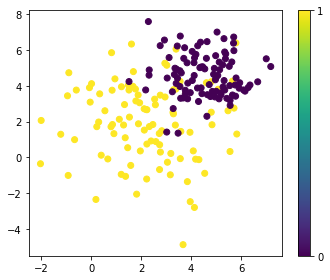

In [10]:
#@title Seleccione los parámetros de los datasets {run:"auto"}
mean_1 = 2 #@param {type:"slider", min:1, max:20, step:0.5}
ds_1 = 1.8 #@param {type:"slider", min:0, max:5, step:0.1}
mean_2 = 4.5 #@param {type:"slider", min:1, max:20, step:0.5}
ds_2 = 1.1 #@param {type:"slider", min:0, max:5, step:0.1}
size = 100 #@param {type:"slider", min:50, max:200, step:50}

data, labels = create_dataset(mean_1, mean_2, ds_1, ds_2, size)
plot_data(data, labels)

In [11]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score,f1_score
from sklearn.model_selection import train_test_split

def get_metrics(prediction, labels_test):
  print('Accuracy del modelo: ', accuracy_score(prediction, labels_test))
  print('precision del modelo: ', precision_score(prediction, labels_test))
  print('f-score del modelo: ', f1_score(prediction, labels_test))

def knn(data, labels, k):
  data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.50, random_state=15)
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(data_train, labels_train)
  prediction = knn.predict(data_test)
  get_metrics(prediction, labels_test)

In [12]:
# @title Elija el vecindario {run:"auto"}
k = 14 #@param {type:"slider", min:1, max:20, step:1}

knn(data, labels, k)

Accuracy del modelo:  0.89
precision del modelo:  0.875
f-score del modelo:  0.8842105263157894


## Parte 2
Dado un dataset con 2000+ canciones de
Spotify de una usuaria, donde algunas
fueron marcadas como gustadas y otras
no. Cada canción tiene a su vez 16
atributos (nombre, artista, duración,
bailable, etc.). Desarrollar un clasificador
que prediga si una canción dada va a ser
gustada o no.

In [1]:
import pandas as pd
#leemos el dataset
dataset_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
dataset_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
dataset_spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
from sklearn.preprocessing import StandardScaler
dataset_standarized=pd.DataFrame(StandardScaler().fit_transform(dataset_spotify))

In [2]:
 #Transforma valores de texto a numericos
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset_spotify['song_title'] = encoder.fit_transform(dataset_spotify['song_title'])
dataset_spotify['artist'] = encoder.fit_transform(dataset_spotify['artist'])
dataset_spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,1043,449
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,1334,222
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,1906,449
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,1044,95
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,1243,628


In [27]:
#separamos las features de las labels
labels = dataset_spotify['target']
features = dataset_spotify.drop(columns='target')
 
#normalizamos los valores
features_norm = (features - features.mean())/features.std()



In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def getValidation(k_model, k_val, features, labels):
  cv = KFold(n_splits=k_val, shuffle=True, random_state=1)
  model =  neighbors.KNeighborsClassifier(n_neighbors=k_model)
  scores = cross_val_score(model, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
  return np.mean(scores)


In [ ]:
#Dividimos los datos en entrenamiento y test
features_train, features_test, labels_train, labels_test = train_test_split(features_norm, labels, test_size=0.50, random_state=15)


In [46]:
# @title Elija los parametros de kfold cv y la cantidad de vecinos {run:"auto"}
k_model = 12 #@param {type:"slider", min:1, max:50, step:1}
k_val = 5 #@param {type:"slider", min:1, max:20, step:1}

getValidation(k_model, k_val, features_train, labels_train)

0.9196345007635092

In [47]:
#Si ya selecciono el mejor modelo, ahora testealo
knn = neighbors.KNeighborsClassifier(n_neighbors=k_model)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)
get_metrics(prediction, labels_test)


Accuracy del modelo:  0.9256689791873142
precision del modelo:  0.8774703557312253
f-score del modelo:  0.9221183800623053
